In [1]:
import croparray as ca
ca1 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc", as_object=True)

In [2]:
import croparray as ca
ca2 = ca.open_croparray(
    "/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/WT_XBP1/20251217_FCS/WT/DataAnalysis/Cell01.nc", as_object=True)

In [3]:
import croparray as ca
ca3 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/SA_XBP1/DataAnalysis/Cell01.nc", as_object=True)

In [4]:
ca1.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.40, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [5]:
ca2.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.40, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [6]:
ca3.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.40, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [7]:
ca1.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [8]:
ca2.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [9]:
ca3.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [15]:
ca1.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [13]:
ca2.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [14]:
ca3.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [23]:
ecc1 = ca1.ds["ch0_mask_manual__skeleton_longest_path_px"]
{"mean":   ecc1.mean().item(),"median": ecc1.median().item(),"std": ecc1.std().item(),}

{'mean': 2.3910607706850038, 'median': 2.0, 'std': 2.0209429130099306}

In [24]:
ecc2 = ca2.ds["ch0_mask_manual__skeleton_longest_path_px"]
{"mean":   ecc2.mean().item(), "median": ecc2.median().item(),"std":    ecc2.std().item(),}

{'mean': 3.004610529657031,
 'median': 2.414213562373095,
 'std': 2.040362590162478}

In [25]:
ecc3 = ca3.ds["ch0_mask_manual__skeleton_longest_path_px"]
{"mean":   ecc3.mean().item(),"median": ecc3.median().item(),"std":    ecc3.std().item(),}

{'mean': 4.066444123135104,
 'median': 3.414213562373095,
 'std': 2.7853893940573786}

In [17]:
ta1 = ca.crop_array_tools.track_array(ca1, as_object=True)
ta2 = ca.crop_array_tools.track_array(ca2, as_object=True)
ta3 = ca.crop_array_tools.track_array(ca3, as_object=True)

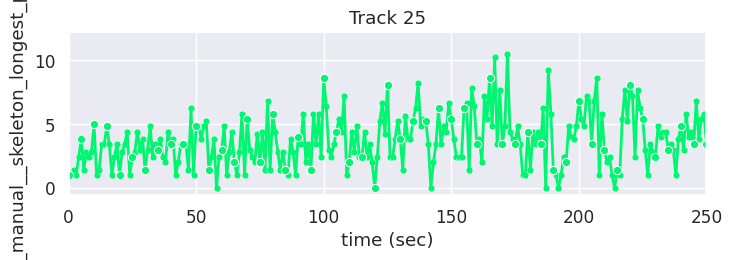

In [21]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__skeleton_longest_path_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1))

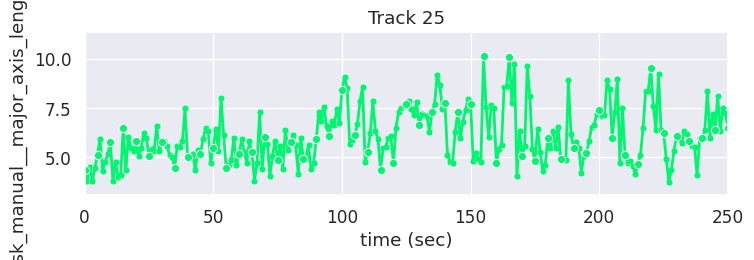

In [22]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1))

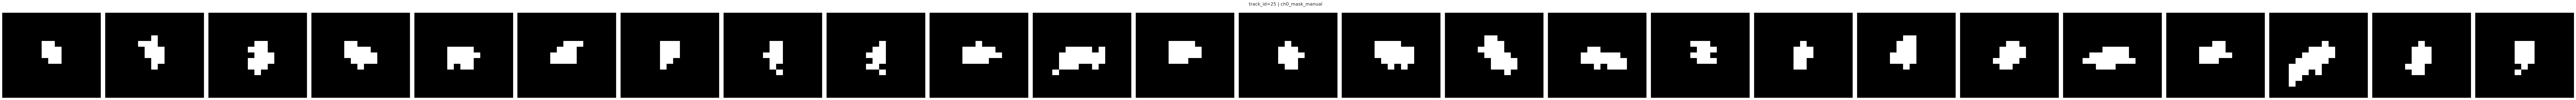

In [78]:
ta2.tplot.plot_trackarray_crops(layer="ch0_mask_manual", track_id=[25], t=(0, 250, 10));

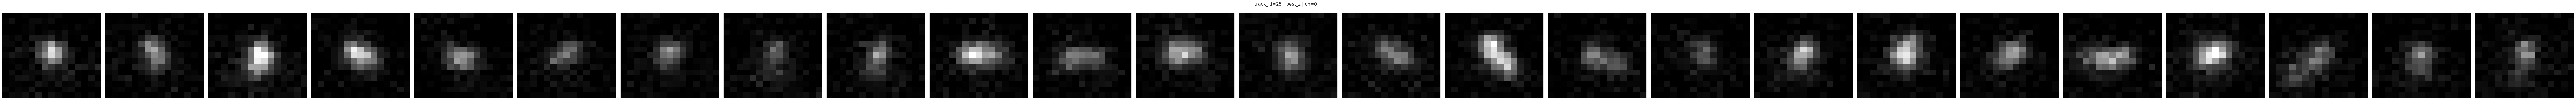

In [79]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[25], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

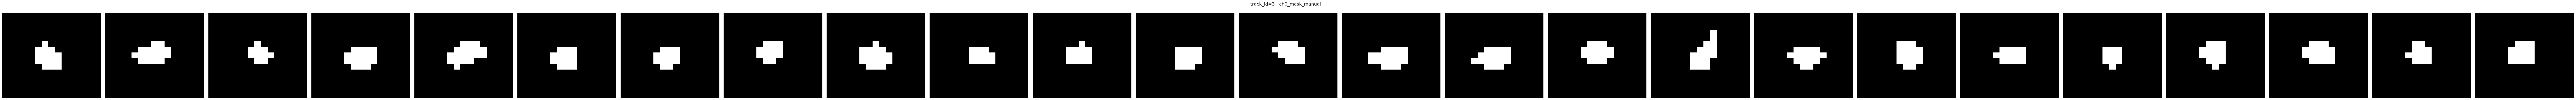

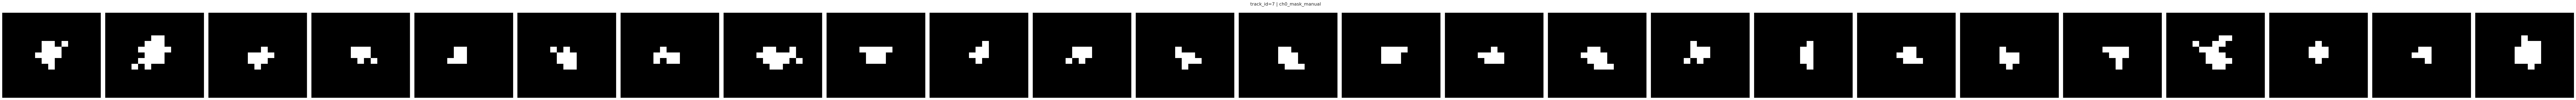

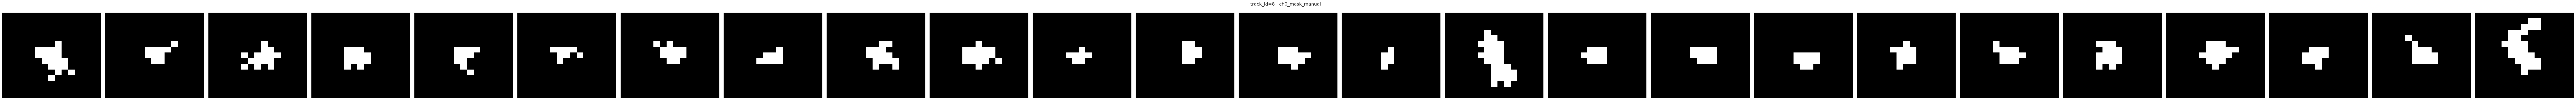

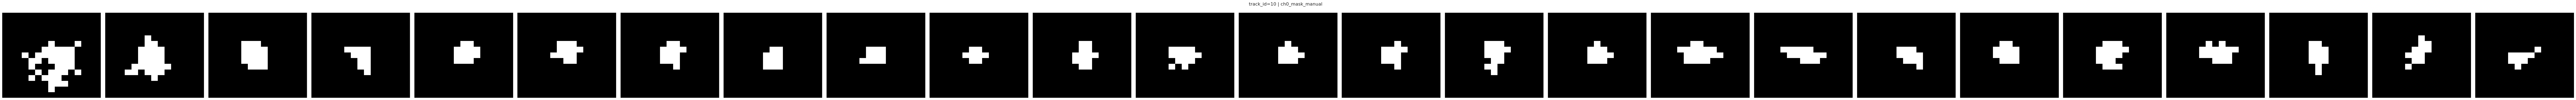

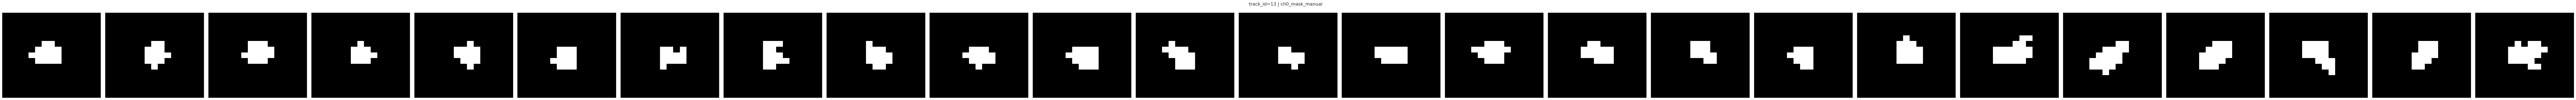

In [85]:
ta3.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

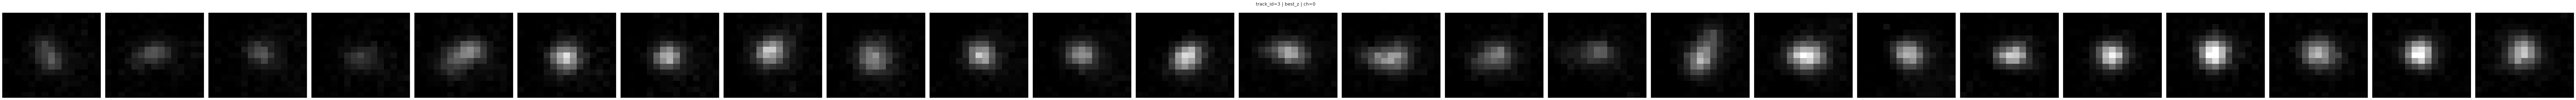

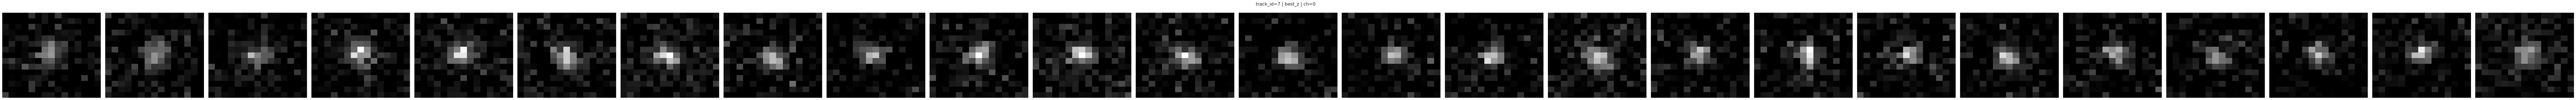

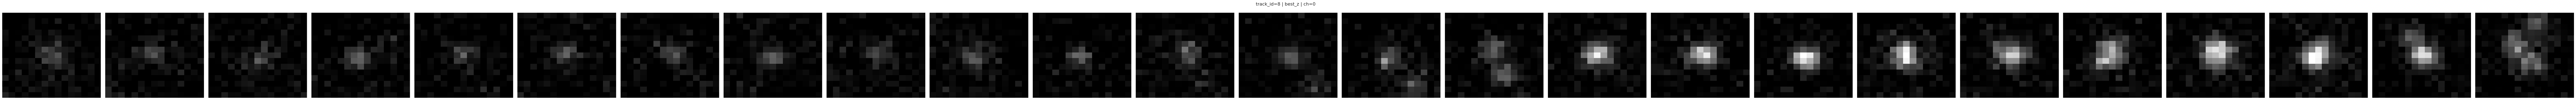

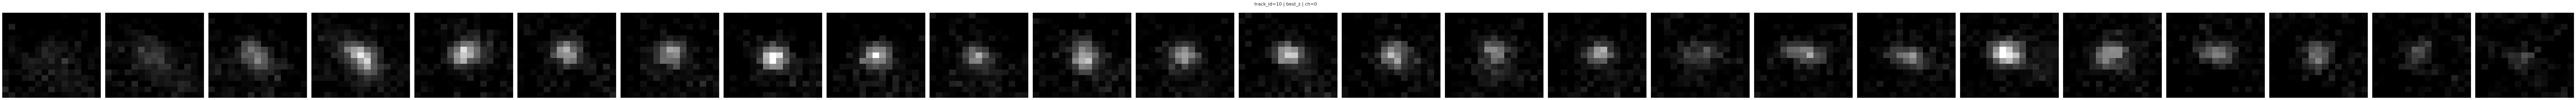

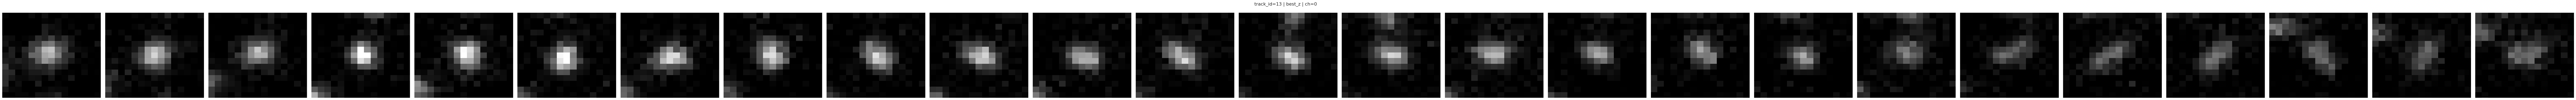

In [86]:
ta3.tplot.plot_trackarray_crops(fov=0, track_id=[3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

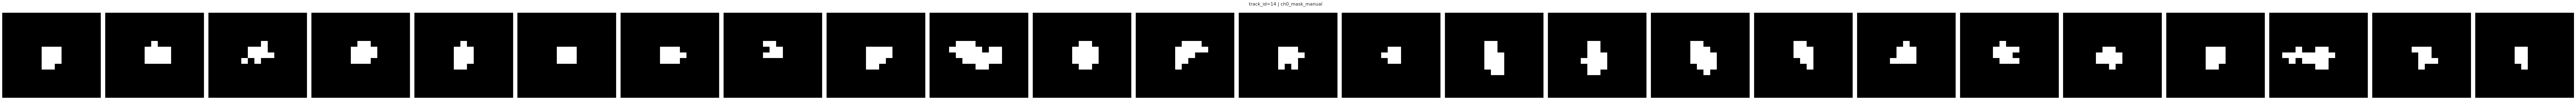

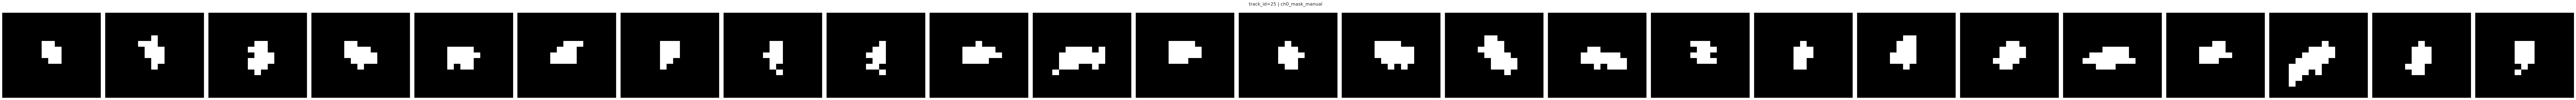

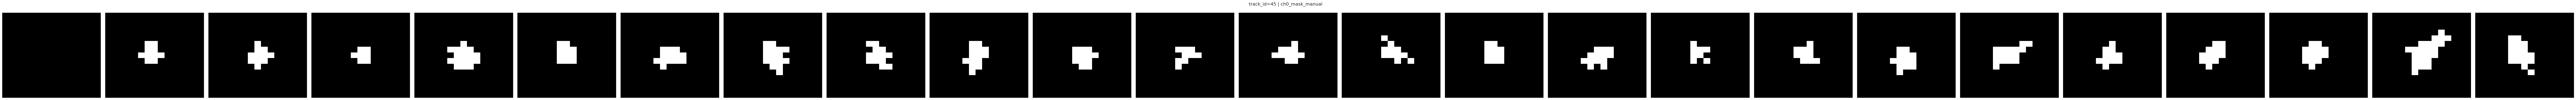

In [88]:
ta2.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

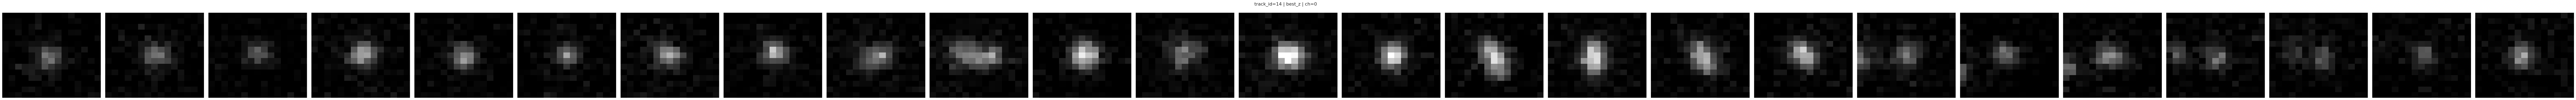

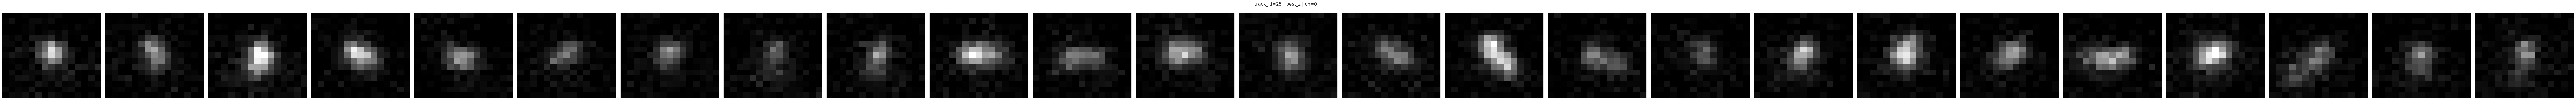

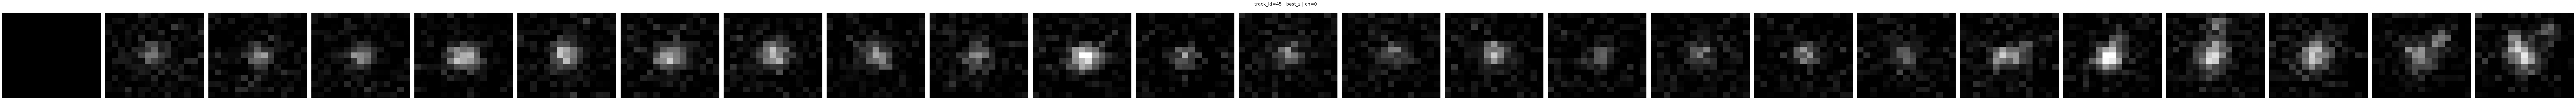

In [87]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

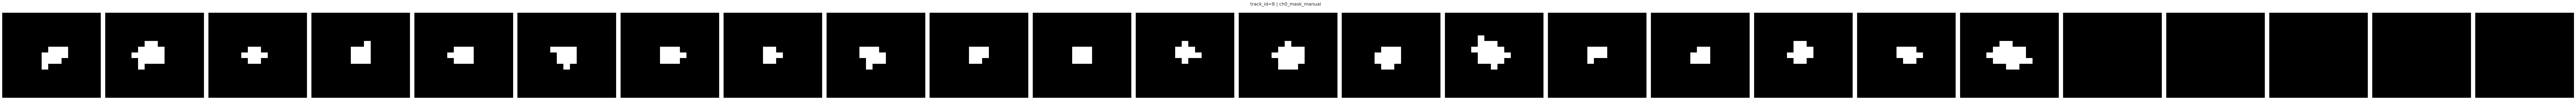

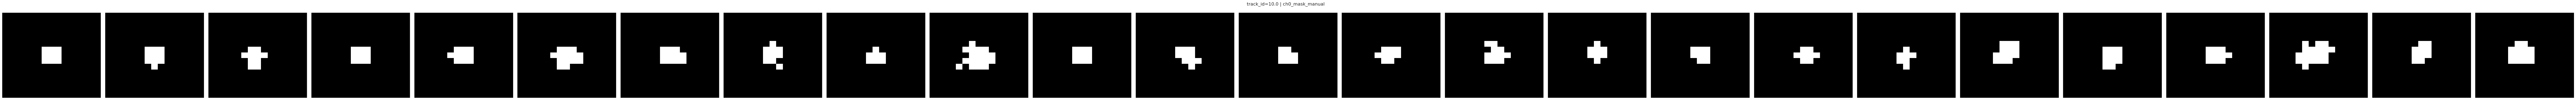

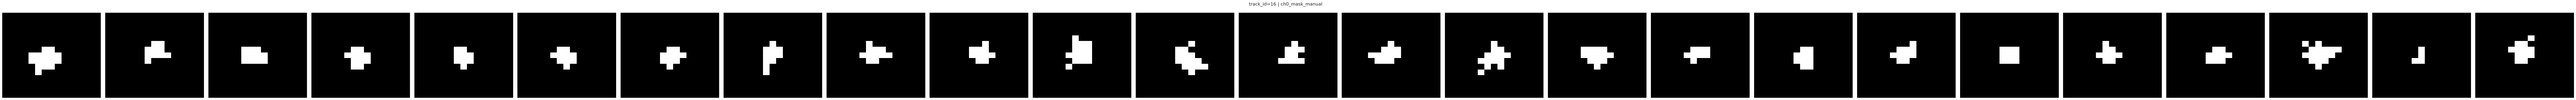

In [89]:
ta1.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[8,10.,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

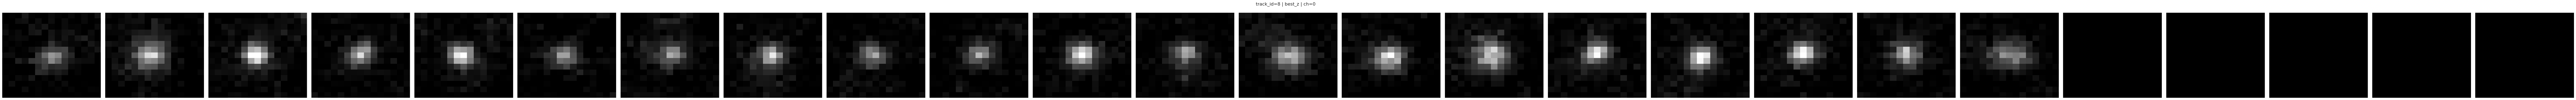

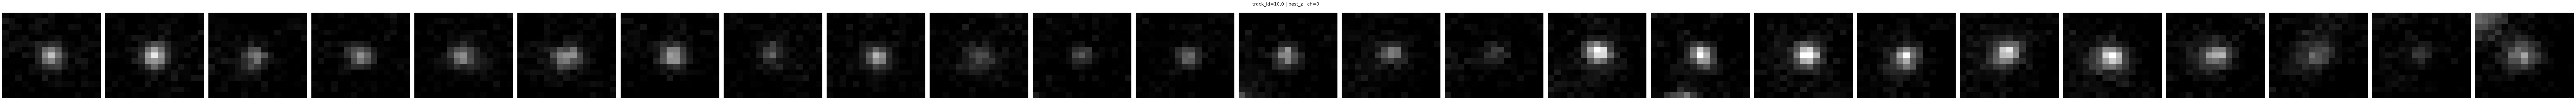

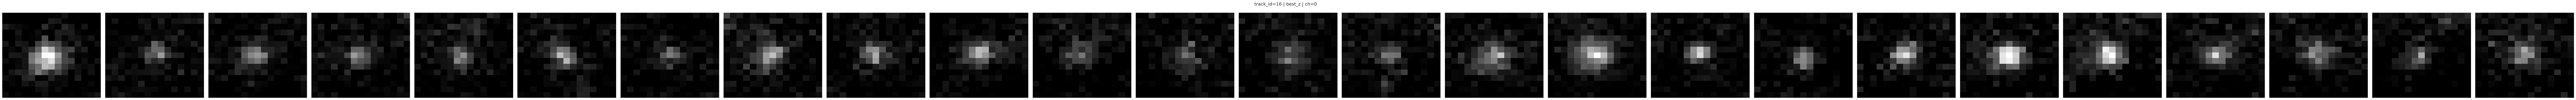

In [83]:
ta1.tplot.plot_trackarray_crops(fov=0, track_id=[8,10.,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

In [15]:
import napari
viewer = napari.Viewer()
temp = ca.tools.montage(ta3, row = 'track_id', col = 'track_id').best_z
temp_ch0 = ca.tools.montage(ta3, row = 'track_id', col = 'track_id').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x7ac694045c00>